In [1]:
import pandas as pd
import sklearn
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


# Data overwiev

## Print shape of data

In [6]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
x_train.shape

(60000, 28, 28)

In [30]:
print("Image info :\n")
print("Number of images : ",len(x_train))
print("Image width : ",x_train[0].shape[0])
print("Image height : ",x_train[1].shape[1])

Image info :

Number of images :  60000
Image width :  28
Image height :  28


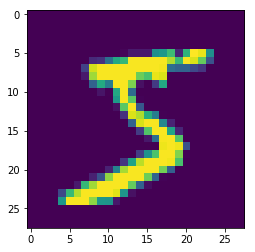

In [7]:
plt.imshow(x_train[0])

In [12]:
y_train[0]

5

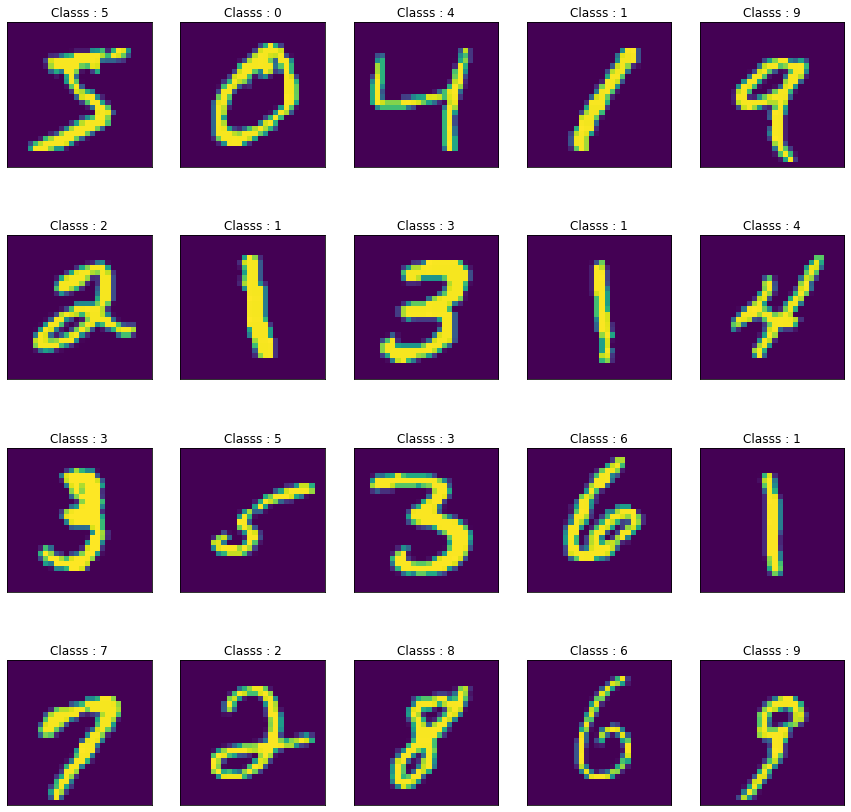

In [18]:
plt.figure(figsize=(15,15))
for i in range(20):
    ax = plt.subplot(4,5,i+1)
    plt.title("Classs : " + str(y_train[i]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(x_train[i])

# Model architecture

In [42]:
from keras import layers
from keras import models

In [43]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [44]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [45]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
60000/60000 [==============================] - 16s 271us/step - loss: 0.1750 - accuracy: 0.9452
Epoch 2/5
60000/60000 [==============================] - 16s 261us/step - loss: 0.0468 - accuracy: 0.9857
Epoch 3/5
60000/60000 [==============================] - 16s 259us/step - loss: 0.0325 - accuracy: 0.9900
Epoch 4/5
60000/60000 [==============================] - 16s 264us/step - loss: 0.0242 - accuracy: 0.9923
Epoch 5/5
60000/60000 [==============================] - 17s 283us/step - loss: 0.0193 - accuracy: 0.9942


In [46]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 103us/step


In [47]:
test_acc

0.9918000102043152

In [50]:
model.save("../models/classifier99.h5")

# Load model

In [ ]:
new_model = keras.models.load_model("../models/classifier99.h5")

In [52]:
test_loss, test_acc2 = new_model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 100us/step


In [53]:
test_acc2

0.9918000102043152